# Exploring solution for dataset

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
from ultralytics import YOLO
import sys

In [4]:
def extract_frames(video_path, output_folder, interval_seconds=5):
    cap = cv2.VideoCapture(video_path)
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    interval_frames = frame_rate * interval_seconds

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_count % interval_frames == 0:
            output_filename = f"{output_folder}/frame_{frame_count}.jpg"
            cv2.imwrite(output_filename, frame)
            print(f"Saved {output_filename}")
        
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

def add_noise_to_image(image_path, noise_pctg=0.1, blur_pctg=0.1):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32) / 255.0

    # Add noise
    noise = np.random.uniform(low=0.0, high=1.0, size=image.shape)
    noise_mask = np.random.binomial(1, noise_pctg, size=image.shape[:-1])
    noise_mask = np.expand_dims(noise_mask, axis=-1)
    noise_mask = np.repeat(noise_mask, 3, axis=-1)
    image = noise_mask * noise + (1 - noise_mask) * image

    # Add blur
    blur_mask = np.random.binomial(1, blur_pctg, size=image.shape[:-1])
    blur_mask = np.expand_dims(blur_mask, axis=-1)
    blur_mask = np.repeat(blur_mask, 3, axis=-1)
    image = blur_mask * cv2.blur(image, (5, 5)) + (1 - blur_mask) * image

    image = (image * 255.0).astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image



In [6]:
def predict_image(image_path, model=YOLO("../models/yolo/yolov8m.pt"), add_noise=False, noise_pctg=0.1, blur_pctg=0.04):
    if add_noise:
        image = cv2.imread(image_path)
        noisy_image = add_noise_to_image(image_path, noise_pctg, blur_pctg)
        noisy_image_path = f"../data/processed/noisy/{image_path.split('.')[0]}_noisy.jpg"
        cv2.imwrite(noisy_image_path, noisy_image)
        image_path = noisy_image_path
    
    results = model.predict(image_path)
    result = results[0]
    #save model scores
    model_scores = []
    for box in result.boxes:
        model_scores.append(box.conf[0].item())
    img = cv2.imread(image_path)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        cv2.rectangle(img, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
        cv2.putText(img, f"{class_id} {conf}", (cords[0], cords[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        #write predicted image to data/processed/outputs
        cv2.imwrite(f"../data/processed/outputs/{image_path.split('/')[-1].split('.')[0]}_predicted.jpg", img)
    return img, model_scores

In [7]:
model = YOLO('../models/yolo/yolov8m.pt')

In [8]:
import sys
sys.path.append('/home/joaotaves/repos/TCC-CDIA')


In [9]:
from src.pipeline import PredPipe

In [10]:
image = "../data/frames/images/SP1_mp4-26_jpg.rf.12ad30efb5d417327304d391e7f5aa59.jpg"



In [11]:
noise = [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5] 

In [12]:
model_results = []
for element in noise:
    pred = PredPipe(model, image, element, 0)
    print({"noise": element, "blur": 0})
    pred.predict_image(add_noise = True)
    #save model results for every iteration to plot model performance in every noise level
    print("--------------------------------------------------")
    model_results.append({"noise": element, "model_scores": pred.results})

#save results to csv


{'noise': 0.01, 'blur': 0}


2023-09-18 11:47:43.851340: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.01_noisy_1695048463.jpg: 384x640 1 person, 7 cars, 1 motorcycle, 1 truck, 3 traffic lights, 76.9ms
Speed: 1.8ms preprocess, 76.9ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.03, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.03_noisy_1695048470.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 1 truck, 3 traffic lights, 23.9ms
Speed: 2.2ms preprocess, 23.9ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.05_noisy_1695048470.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 1 truck, 3 traffic lights, 25.7ms
Speed: 1.9ms preprocess, 25.7ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.05, 'blur': 0}



image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.07_noisy_1695048470.jpg: 384x640 1 person, 3 cars, 1 motorcycle, 2 traffic lights, 24.8ms
Speed: 2.0ms preprocess, 24.8ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.07, 'blur': 0}


--------------------------------------------------
{'noise': 0.09, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.09_noisy_1695048471.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 1 truck, 2 traffic lights, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.11_noisy_1695048471.jpg: 384x640 1 person, 4 cars, 1 motorcycle, 24.5ms
Speed: 2.1ms preprocess, 24.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.11, 'blur': 0}


--------------------------------------------------
{'noise': 0.13, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.13_noisy_1695048472.jpg: 384x640 1 person, 3 cars, 1 motorcycle, 1 truck, 1 traffic light, 23.5ms
Speed: 2.8ms preprocess, 23.5ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.15, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.15_noisy_1695048472.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 2 traffic lights, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.17_noisy_1695048473.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 1 truck, 23.2ms
Speed: 1.9ms preprocess, 23.2ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.17, 'blur': 0}


--------------------------------------------------
{'noise': 0.2, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.2_noisy_1695048473.jpg: 384x640 2 cars, 1 motorcycle, 24.0ms
Speed: 2.2ms preprocess, 24.0ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.25_noisy_1695048473.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 24.1ms
Speed: 1.8ms preprocess, 24.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.25, 'blur': 0}


--------------------------------------------------
{'noise': 0.3, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.3_noisy_1695048474.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 25.4ms
Speed: 2.2ms preprocess, 25.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.35, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.35_noisy_1695048474.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 1 truck, 24.5ms
Speed: 2.0ms preprocess, 24.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.4_noisy_1695048474.jpg: 384x640 2 cars, 1 truck, 23.5ms
Speed: 2.1ms preprocess, 23.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------
{'noise': 0.4, 'blur': 0}


--------------------------------------------------
{'noise': 0.5, 'blur': 0}


image 1/1 /home/joaotaves/repos/TCC-CDIA/notebooks/../data/processed/noisy/SP1_mp4-26_jpg_0.5_noisy_1695048475.jpg: 384x640 2 cars, 26.1ms
Speed: 2.1ms preprocess, 26.1ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------


In [13]:
name = pred.name

In [43]:
#plot model results
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_results(model_results, name):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(10, 5))
    class_scores_dict = {}
    for element in model_results:
        for class_name, class_scores in element["model_scores"].items():
            if class_name not in class_scores_dict:
                class_scores_dict[class_name] = []
            class_scores_dict[class_name].extend(class_scores)
    for class_name, class_scores in class_scores_dict.items():
        plt.plot(class_scores, label=f"class: {class_name}")
    #make legend smaller
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title("Model performance in different noise levels")
    plt.ylabel("Model score")
    #save plot
    plt.savefig(f"../reports/model_performance_noise_{name}.png", bbox_inches='tight')



In [30]:
import pandas as pd
def save_model_results(model_results, name):
    df = pd.DataFrame(model_results)
    df.to_csv(f"../reports/model_results_{name}.csv", index=False)

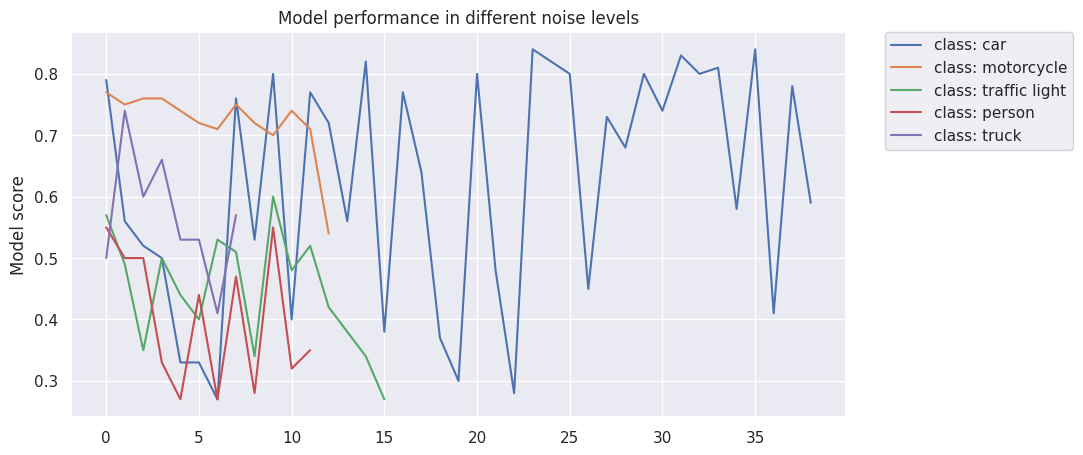

In [44]:
plot_model_results(model_results, name)

In [42]:
save_model_results(model_results, name)